Reference\
https://www.datacamp.com/community/tutorials/xgboost-in-python

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.keys())
print(boston.feature_names)
print(boston.DESCR)

In [ ]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
data.head()

In [ ]:
data.info()

If you plan to use XGBoost on a dataset which has **categorical** features you may want to consider applying some **encoding** (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as `NA` in the dataset you may or may not do a separate treatment for them, because **XGBoost is capable of handling missing values internally**. You can check out this [link](https://github.com/dmlc/xgboost/issues/21) if you wish to know more on this.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# XGBClassifier() for classification
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, \
                          max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
data = pd.read_csv('TrainOnMe.csv')

unique_y = ['Atsuto','Bob','Jörg']
data = data[data['y'].isin(unique_y)]
unique_x5 = ['True', 'False']
data = data[data['x5'].isin(unique_x5)]
unique_x6 = ['F', 'A', 'Fx', 'C', 'E', 'B', 'D']
data = data[data['x6'].isin(unique_x6)]
data[['x1','x2','x3','x4','x7','x8','x9','x10']] = data[['x1','x2','x3','x4','x7','x8','x9','x10']].apply(pd.to_numeric)

print(f"shape of the data: {data.shape}\n")
print("y unique and count: ")
print(data.y.value_counts())
print('\n')
print("x5 unique and count: ")
print(data.x5.value_counts())
print('\n')
print("x6 unique and count: ")
print(data.x6.value_counts())

shape of the data: (997, 12)

y unique and count: 
Bob       517
Atsuto    296
Jörg      184
Name: y, dtype: int64


x5 unique and count: 
False    685
True     312
Name: x5, dtype: int64


x6 unique and count: 
F     617
A     228
Fx     35
C      33
E      29
B      28
D      27
Name: x6, dtype: int64


In [ ]:
data.info()

In [3]:
# remove outliers
data = data.drop(data[(data.x7 < -100) | (data.x7 > 100)].index)
data = data.drop(data[(data.x8 < -100) | (data.x8 > 100)].index)

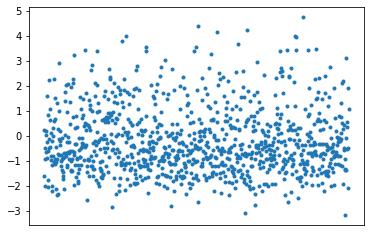

In [4]:
pts = (data.loc[:,['x8']]).to_numpy().flatten()
plt.plot(pts,'.')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

In [ ]:
data.head()

In [5]:
y, X = data.iloc[:,1], data.iloc[:,2:]

# map y from object to int
y_dict = {'Atsuto': 0, 'Bob': 1, 'Jörg':2}
y = y.replace(y_dict)

# one-hot encoding
X = pd.get_dummies(X)

In [ ]:
y.head()

In [ ]:
print(X.isnull().values.any())
print(f"shape of the data: {X.shape}\n")
X.head()

In [6]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
# XGBClassifier() for classification
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train,y_train)
preds = xg_clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.8514056224899599


In [10]:
test_data = pd.read_csv('EvaluateOnMe.csv')
test_data.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1000,2.11820,0.30064,0.11441,0.08570,True,E,-0.23694,1.34755,4.41336,0.92271
1,1001,0.33456,-0.08190,-0.70144,0.69276,False,F,-0.97349,-1.46992,-3.30673,0.22554
2,1002,1.52200,-0.50104,-1.34160,1.28651,False,F,1.59231,1.96883,-1.36040,2.68363
3,1003,1.27021,1.24996,-0.14228,0.15172,True,A,-0.28572,-0.85520,-3.86445,0.86683
4,1004,-1.91738,0.83558,-0.88311,0.95150,False,A,0.74576,2.59335,-2.41387,1.01367
